<a id="import"></a>
# <p style="background-color:#1ca3e3; font-family:arial; color: #ffffff; font-size:130%; text-align:center; border-radius:15px 15px;">Step 1 | Goal Formulation</p>

<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">

<h2 align="left"><font color=#ffffff>Purpose of the analysis:</font></h2>

Can we reveal the structure and logic of the cryptocurrency market using only basic dataset features, without any background knowledge about the coins themselves?
</div>

PS: I wanted to include Gold in the first project, but I had to remove it from the project. Please do not take into consideration gold related stuff.

<a id="preparation"></a>
# <p style="background-color:#1ca3e3; font-family:arial; color: #ffffff; font-size:130%; text-align:center; border-radius:15px 15px;">Step 2 | Data Preparation</p>


# <b><span style='color: #1ca3e3'>Step 2.1 |</span><span style='color:#000000'> Data Loading</span></b>

We begin by loading daily price and volume data for the selected cryptocurrencies and for gold. The cryptocurrency data covers Bitcoin, Ethereum, and another major coin from 2013 for Bitcoin to July 2021 for all cryptocurrencies. 
Gold data is sourced from the largest timestamp available in the dataset (2013-2021). We used data from the API yfinance for this one. 



&#8594; *First, we import all the necessary libraries for this project, and we download the data through Kaggle API*

In [12]:
import os
import pandas as pd
import glob
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


os.environ['KAGGLE_USERNAME'] = 'johanlfc'
os.environ['KAGGLE_KEY'] = '1722cd622164ece46a93e7600830ff00'

!kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory
!unzip cryptocurrencypricehistory.zip

Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
License(s): CC0-1.0
cryptocurrencypricehistory.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cryptocurrencypricehistory.zip
  inflating: coin_Aave.csv           
  inflating: coin_BinanceCoin.csv    
  inflating: coin_Bitcoin.csv        
  inflating: coin_Cardano.csv        
  inflating: coin_ChainLink.csv      
  inflating: coin_Cosmos.csv         
  inflating: coin_CryptocomCoin.csv  
  inflating: coin_Dogecoin.csv       
  inflating: coin_EOS.csv            
  inflating: coin_Ethereum.csv       
  inflating: coin_Iota.csv           
  inflating: coin_Litecoin.csv       
  inflating: coin_Monero.csv         
  inflating: coin_NEM.csv            
  inflating: coin_Polkadot.csv       
  inflating: coin_Solana.csv         
  inflating: coin_Stellar.csv        
  inflating: coin_Tether.csv         
  inflating: coin_Tron.csv           
  inflating: co


&#8594; *Now let's import the data into datasets, from the csv downloaded, and find the overall earliest date among all coins to be able in a second time to import Gold data from this earliest date*

In [13]:
coin_files = glob.glob("coin_*.csv")
crypto_data = {}

start_dates = []

for file in coin_files:
    coin_name = os.path.basename(file)[5:-4]
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    crypto_data[coin_name] = df
    start_dates.append(df['Date'].min())

# Find the overall earliest date among all coins
global_start_date = min(start_dates).date()
print("Earliest date among all coins:", global_start_date)


Earliest date among all coins: 2013-04-29



&#8594; *We use the earliest date to import gold data from yFinance API*

In [14]:
start_date_str = str(global_start_date)         
end_date_str = "2021-07-06"                     

gold = yf.download('GC=F', start=start_date_str, end=end_date_str).reset_index()

print("Gold Futures (GC=F):")
display(gold.head())

[*********************100%***********************]  1 of 1 completed

Gold Futures (GC=F):


Price        Date        Close         High          Low         Open Volume
Ticker                    GC=F         GC=F         GC=F         GC=F   GC=F
0      2013-04-29  1467.400024  1475.500000  1462.300049  1462.699951    269
1      2013-04-30  1472.199951  1476.599976  1461.000000  1471.099976    534
2      2013-05-01  1446.300049  1477.099976  1440.000000  1475.800049    131
3      2013-05-02  1467.699951  1471.199951  1453.500000  1459.000000    244
4      2013-05-03  1464.300049  1487.099976  1461.400024  1465.500000     68


&#8594; *Before moving on to the enhancing and data cleaning part, here is a summary of all the datasets we will work with*

In [15]:
print("Crypto DataFrames:")
for x in crypto_data:
    print(f"  crypto_data['{x}']")

print("\nGold DataFrame:")
print("  gold")

Crypto DataFrames:
  crypto_data['NEM']
  crypto_data['EOS']
  crypto_data['Monero']
  crypto_data['Polkadot']
  crypto_data['USDCoin']
  crypto_data['Uniswap']
  crypto_data['BinanceCoin']
  crypto_data['Iota']
  crypto_data['Aave']
  crypto_data['Solana']
  crypto_data['Bitcoin']
  crypto_data['Cardano']
  crypto_data['Tether']
  crypto_data['Cosmos']
  crypto_data['ChainLink']
  crypto_data['Litecoin']
  crypto_data['XRP']
  crypto_data['Ethereum']
  crypto_data['Tron']
  crypto_data['Stellar']
  crypto_data['CryptocomCoin']
  crypto_data['Dogecoin']
  crypto_data['WrappedBitcoin']

Gold DataFrame:
  gold


# <b><span style='color: #1ca3e3'>Step 2.2 |</span><span style='color:#000000'> Data Cleaning and Enhancing</span></b>

We now inspect and clean all loaded datasets (crypto and gold).  
We are going to:
- check for and handle missing values,
- remove duplicates,
- standardize date columns,
- aligne variables for comparison,
- describe the columns in each dataset.



&#8594; *Let's print the number of missing values and duplicates for each coin, so we can handle potential future errors. We then remove those duplicates and missing values, plus we delete rows where date is missing to avoid working with timeless row.*

In [16]:
for coin, df in crypto_data.items():
    n_missing = df.isnull().sum().sum()
    n_duplicates = df.duplicated().sum()
    print(f"{coin}: missing={n_missing}, duplicates={n_duplicates}")

    df = df.drop_duplicates()
    df = df.dropna(subset=['Date'])
    crypto_data[coin] = df

Crypto coins loaded: ['NEM', 'EOS', 'Monero', 'Polkadot', 'USDCoin', 'Uniswap', 'BinanceCoin', 'Iota', 'Aave', 'Solana', 'Bitcoin', 'Cardano', 'Tether', 'Cosmos', 'ChainLink', 'Litecoin', 'XRP', 'Ethereum', 'Tron', 'Stellar', 'CryptocomCoin', 'Dogecoin', 'WrappedBitcoin']
NEM: missing=0, duplicates=0
EOS: missing=0, duplicates=0
Monero: missing=0, duplicates=0
Polkadot: missing=0, duplicates=0
USDCoin: missing=0, duplicates=0
Uniswap: missing=0, duplicates=0
BinanceCoin: missing=0, duplicates=0
Iota: missing=0, duplicates=0
Aave: missing=0, duplicates=0
Solana: missing=0, duplicates=0
Bitcoin: missing=0, duplicates=0
Cardano: missing=0, duplicates=0
Tether: missing=0, duplicates=0
Cosmos: missing=0, duplicates=0
ChainLink: missing=0, duplicates=0
Litecoin: missing=0, duplicates=0
XRP: missing=0, duplicates=0
Ethereum: missing=0, duplicates=0
Tron: missing=0, duplicates=0
Stellar: missing=0, duplicates=0
CryptocomCoin: missing=0, duplicates=0
Dogecoin: missing=0, duplicates=0
WrappedBit


&#8594; *Now we need to standardize all columns to make sure to avoid future errors while working with the data*

In [17]:
def flatten_columns(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = [col[0] if col[0] == 'Date' else f"{col[0]}_{col[1]}" for col in df.columns]
    return df

def standardize_index_columns(df, ticker):
    mapping = {
        f"Open_{ticker}": "Open",
        f"High_{ticker}": "High",
        f"Low_{ticker}": "Low",
        f"Close_{ticker}": "Close",
        f"Volume_{ticker}": "Volume"
    }
    df = df.rename(columns=mapping)
    return df

gold = flatten_columns(gold)
gold = standardize_index_columns(gold, 'GC=F')


&#8594; *Let's do the same work for gold, by checking missing and duplicate data, and drop them if any*

In [18]:
def report_missing_and_duplicates(df, name):
    n_missing = df.isnull().sum().sum()
    n_duplicates = df.duplicated().sum()
    print(f"{name}: missing={n_missing}, duplicates={n_duplicates}")

report_missing_and_duplicates(gold, "Gold Futures")

gold = gold.drop_duplicates().dropna(subset=['Date'])

Gold Futures: missing=0, duplicates=0



&#8594; *As we have 2 sources of data with different format for the date, one has the hours, minutes and seconds, while the other only has the date, we will ensure all 'Date' columns are just the date (drop any hours/minutes/seconds). We will then print a table with the description of each column of the datasets.*

In [19]:
for coin, df in crypto_data.items():
    df['Date'] = pd.to_datetime(df['Date']).dt.date  # Keeps only date part
    df = df.sort_values('Date')
    crypto_data[coin] = df

for df in [gold]:
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    df.sort_values('Date', inplace=True)

| Variable      | Description                                  |
|---------------|----------------------------------------------|
| Date          | Observation date                             |
| Open          | Opening price                                |
| High          | Highest price of the day                     |
| Low           | Lowest price of the day                      |
| Close         | Closing price                                |
| Volume        | Trading volume                               |
| Market Cap    | Total market capitalization (crypto only)    |


&#8594; *Before moving to the next part, we print a summary of the timestamps for which we have data (for each coin), which could be useful in the future*

In [20]:
print("Date ranges for all datasets:")
for coin, df in crypto_data.items():
    print(f"{coin}: {df['Date'].min()} to {df['Date'].max()} ({len(df)} rows)")

print(f"Gold: {gold['Date'].min()} to {gold['Date'].max()} ({len(gold)} rows)")

Date ranges for all datasets:
NEM: 2015-04-02 to 2021-07-06 (2288 rows)
EOS: 2017-07-02 to 2021-07-06 (1466 rows)
Monero: 2014-05-22 to 2021-07-06 (2602 rows)
Polkadot: 2020-08-21 to 2021-07-06 (320 rows)
USDCoin: 2018-10-09 to 2021-07-06 (1002 rows)
Uniswap: 2020-09-18 to 2021-07-06 (292 rows)
BinanceCoin: 2017-07-26 to 2021-07-06 (1442 rows)
Iota: 2017-06-14 to 2021-07-06 (1484 rows)
Aave: 2020-10-05 to 2021-07-06 (275 rows)
Solana: 2020-04-11 to 2021-07-06 (452 rows)
Bitcoin: 2013-04-29 to 2021-07-06 (2991 rows)
Cardano: 2017-10-02 to 2021-07-06 (1374 rows)
Tether: 2015-02-26 to 2021-07-06 (2318 rows)
Cosmos: 2019-03-15 to 2021-07-06 (845 rows)
ChainLink: 2017-09-21 to 2021-07-06 (1385 rows)
Litecoin: 2013-04-29 to 2021-07-06 (2991 rows)
XRP: 2013-08-05 to 2021-07-06 (2893 rows)
Ethereum: 2015-08-08 to 2021-07-06 (2160 rows)
Tron: 2017-09-14 to 2021-07-06 (1392 rows)
Stellar: 2014-08-06 to 2021-07-06 (2527 rows)
CryptocomCoin: 2018-12-15 to 2021-07-06 (935 rows)
Dogecoin: 2013-12-16

<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">
<h2 align="left"><font color=#ffffff>Key insight:</font></h2>
All datasets have been inspected and cleaned.  
Each asset’s data is available as a separate dataframe, with its own full available date range and variables standardized.  
The data is now ready for exploratory and comparative analysis.
</div>

<a id="import"></a>
# <p style="background-color:#1ca3e3; font-family:arial; color: #ffffff; font-size:130%; text-align:center; border-radius:15px 15px;">Step 3 | Data Exploration</p>

# <b><span style='color: #1ca3e3'>Step 3.1 |</span><span style='color:#000000'> Dataset and Cryptocurrencies Analysis</span></b>

Let's analyse this dataset from different point of views: return of each cryptocurrencies, volatility, volume traded, correlation between different crypto.
The final goal of this first part, is to build coherent groups of cryptocurrencies, with the only informations we find in this dataset, and without knowing the technology, the goal, the features of each crypto. 


### 3.1.1 | Group of different crypto

In this first subcategory, we are trying to create simple groups of cryptocurrencies to be able to analyse the coins in the future subcategories. Currently, it would be impossible to see any patern if we start plotting let's say the return of 23 coins.
Creating small groups of coins, even if these groups are not the most coherent, will make the future analysis readable.


&#8594; *First thing first, let's make an exhaustive summary table with all the useful infromation, for all the cryptocurrencies. This table ranks crypto by market cap, which can be a first and simple way to categorize them.*

In [82]:
summary = []
for coin in full_wide.columns[1:]:  
    series = full_wide[['Date', coin]].dropna()
    coin_df = crypto_data[coin].sort_values('Date')
    if not series.empty:
        first_price = series[coin].iloc[0]
        last_price = series[coin].iloc[-1]
        pct_change = ((last_price - first_price) / first_price) * 100 if first_price != 0 else float('nan')
        start_date = series['Date'].iloc[0]
        end_date = series['Date'].iloc[-1]
        # Get the volume and market cap for the last day in the price series
        last_day = end_date
        coin_df_last_row = coin_df[coin_df['Date'] == last_day]
        last_volume = coin_df_last_row['Volume'].iloc[0] if not coin_df_last_row.empty else float('nan')
        last_market_cap = coin_df_last_row['Marketcap'].iloc[0] if ('Marketcap' in coin_df.columns and not coin_df_last_row.empty) else float('nan')
        summary.append({
            'Coin': coin,
            'First Price': first_price,
            'Last Price': last_price,
            'Pct Change (%)': pct_change,
            'Last Volume': last_volume,
            'Market Cap': last_market_cap,
            'Start Date': start_date,
            'End Date': end_date
        })

summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values(by='Market Cap', ascending=False).reset_index(drop=True)

from IPython.display import display
display(summary_df)

Coin  First Price    Last Price  Pct Change (%)   Last Volume  \
0          Bitcoin   144.539993  34235.193451    23585.619926  2.650126e+10   
1         Ethereum     0.753325   2324.679449   308489.187124  2.089186e+10   
2           Tether     1.205740      1.000090      -17.055907  5.105419e+10   
3      BinanceCoin     0.105138    320.934802   305151.015659  2.203265e+09   
4          Cardano     0.025932      1.418053     5368.392753  1.477700e+09   
5              XRP     0.005613      0.665402    11755.385082  1.938959e+09   
6         Dogecoin     0.000205      0.234422   114402.329004  1.265920e+09   
7          USDCoin     1.006860      1.000059       -0.675512  2.312602e+09   
8         Polkadot     2.875028     16.143564      461.509760  1.001573e+09   
9          Uniswap     6.897257     22.400186      224.769491  8.151239e+08   
10          Solana     0.776819     34.269140     4311.472699  3.653360e+08   
11        Litecoin     4.383900    138.985636     3070.364989  1.504907e+09   
12       ChainLink     0.169680     20.080466    11734.315516  1.156986e+09   
13  WrappedBitcoin  3466.506533  34189.372826      886.277467  2.035448e+08   
14         Stellar     0.002657      0.260190     9692.495341  3.604261e+08   
15            Tron     0.001427      0.064935     4451.011121  6.995041e+08   
16            Aave    53.219243    316.898507      495.458503  9.887055e+08   
17          Monero     2.095580    222.137136    10500.269372  1.678620e+08   
18             EOS     2.710050      3.882325       43.256563  6.967875e+08   
19   CryptocomCoin     0.017243      0.122856      612.483959  1.520764e+08   
20          Cosmos     7.504351     13.159371       75.356548  2.537822e+08   
21            Iota     0.528916      0.851735       61.034030  3.866387e+07   
22             NEM     0.000314      0.133591    42481.938845  6.635341e+07   

      Market Cap  Start Date    End Date  
0   6.418992e+11  2013-04-29  2021-07-06  
1   2.710286e+11  2015-08-08  2021-07-06  
2   6.233384e+10  2015-02-26  2021-07-06  
3   4.924196e+10  2017-07-26  2021-07-06  
4   4.530158e+10  2017-10-02  2021-07-06  
5   3.072284e+10  2013-08-05  2021-07-06  
6   3.055252e+10  2013-12-16  2021-07-06  
7   2.567322e+10  2018-10-09  2021-07-06  
8   1.546772e+10  2020-08-21  2021-07-06  
9   1.315501e+10  2020-09-18  2021-07-06  
10  9.343050e+09  2020-04-11  2021-07-06  
11  9.277627e+09  2013-04-29  2021-07-06  
12  8.775356e+09  2017-09-21  2021-07-06  
13  6.713947e+09  2019-01-31  2021-07-06  
14  6.049985e+09  2014-08-06  2021-07-06  
15  4.653234e+09  2017-09-14  2021-07-06  
16  4.066776e+09  2020-10-05  2021-07-06  
17  3.986738e+09  2014-05-22  2021-07-06  
18  3.707457e+09  2017-07-02  2021-07-06  
19  3.103718e+09  2018-12-15  2021-07-06  
20  2.865093e+09  2019-03-15  2021-07-06  
21  2.367423e+09  2017-06-14  2021-07-06  
22  1.202315e+09  2015-04-02  2021-07-06

&#8594; *Now we are trying either to confirm that the group by market cap is a good idea, and if so, what the potential groups would be. For that, we plot a graph representing the volume according to the market cap. To get a readable plotting, we use a log scale which makes things smaller.*

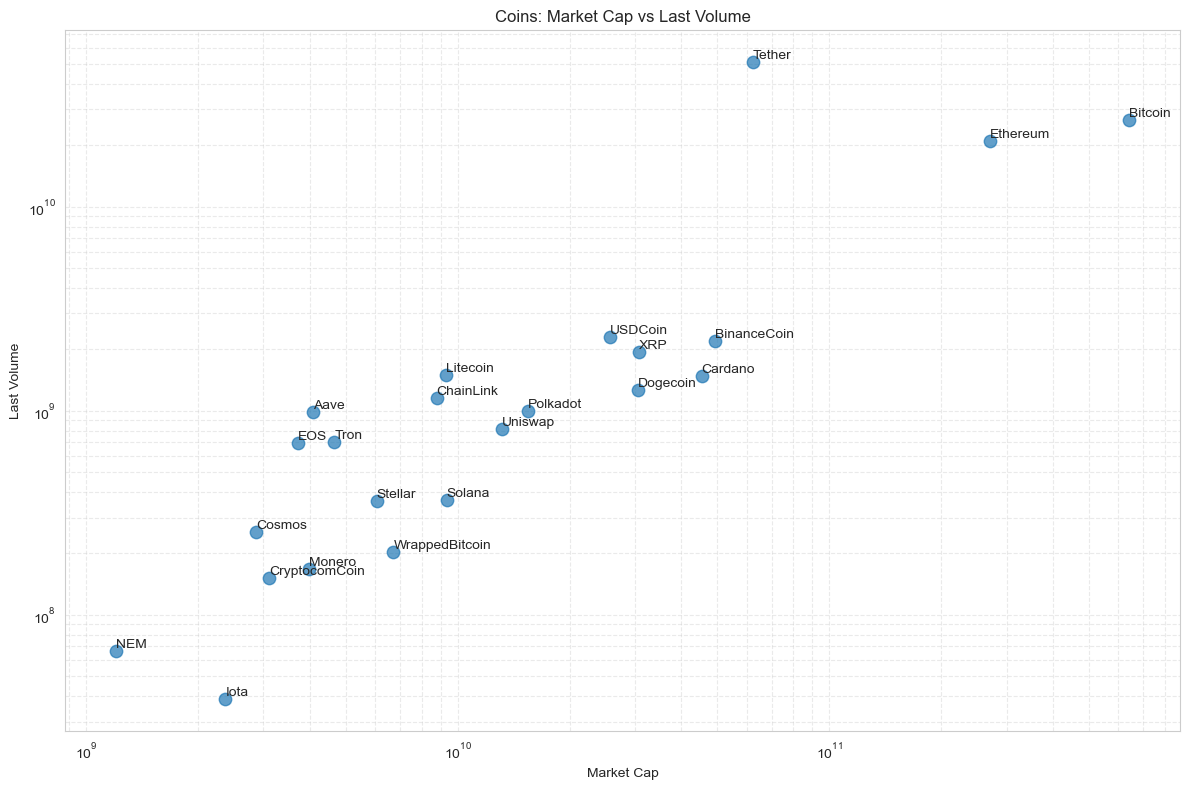

In [86]:
plt.figure(figsize=(12, 8))
plt.scatter(summary_df['Market Cap'], summary_df['Last Volume'], s=80, alpha=0.7)

for i, row in summary_df.iterrows():
    plt.text(row['Market Cap'], row['Last Volume'], row['Coin'], fontsize=10, ha='left', va='bottom')

plt.xlabel('Market Cap')
plt.ylabel('Last Volume')
plt.title('Coins: Market Cap vs Last Volume')
plt.xscale('log')  # Log scale for better spread, otherwise the graphic is illisible 
plt.yscale('log')  # Same here
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

<div style="border: 3px solid #1ca3e3; border-radius:12px; padding: 15px; background-color: #fff; font-size:115%; text-align:left">
<h2 align="left" style="color:#1ca3e3; font-weight:bold;">&#10003; Key Insights</h2>
<ul>
From this graph, we can clearly deduce a correlation between the Volume and the Market Cap. Even if intuitive, this is quiet useful because it confirms a first behavior within the crypto currency world: the higher is the market cap of the coin, the higher is the volume traded on this coin (on a daily basis). We will then check, in the second part if this behavior tends to happen for gold. Also, this suggests that a group by market cap could be a good idea as the market cap influences the behavior of the coin.  
</ul>
</div>

&#8594; *Now let's try to find another correlation which could help us to improve our categorization. We are going to plot the same graph, checking if there is any correlation between the market cap of a coin and the price of a coin.*

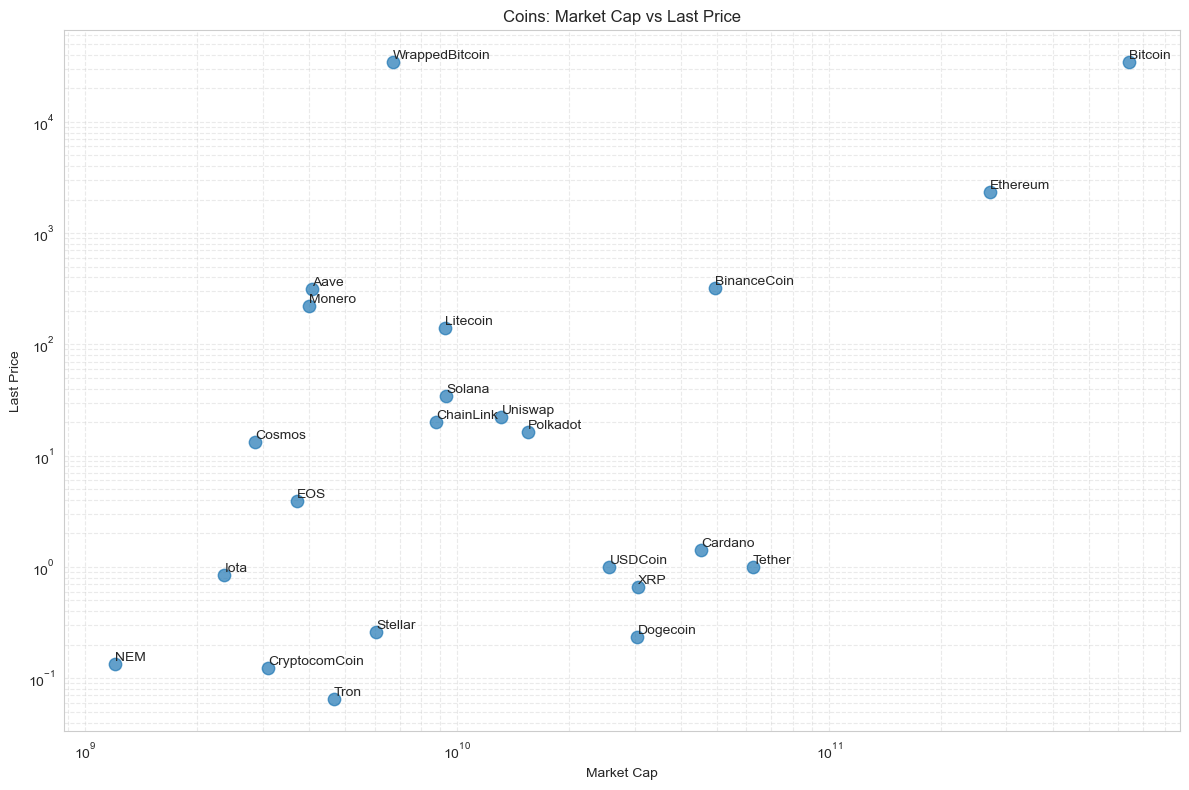

In [89]:
plt.figure(figsize=(12, 8))
plt.scatter(summary_df['Market Cap'], summary_df['Last Price'], s=80, alpha=0.7)

for i, row in summary_df.iterrows():
    plt.text(row['Market Cap'], row['Last Price'], row['Coin'], fontsize=10, ha='left', va='bottom')

plt.xlabel('Market Cap')
plt.ylabel('Last Price')
plt.title('Coins: Market Cap vs Last Price')
plt.xscale('log')  
plt.yscale('log')  
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

<div style="border: 3px solid #1ca3e3; border-radius:12px; padding: 15px; background-color: #fff; font-size:115%; text-align:left">
<h2 align="left" style="color:#1ca3e3; font-weight:bold;">&#10003; Key Insights</h2>
<ul>
On this graphic, it looks like there is a linear correlation between the price of the coin and the market cap: prices seem to increase with market cap. However, we can also see some clusters of crypto which does not follow this rule : USDCoin, XRP, Carda, Tether, Dogecoin ; CryptocomCoin, Tron, Stellar. 
</ul>
<ul>
Even if none of these 2 graphics are sufficient to establish any strict rule or correlation within the crypto market, it looks like the market cap is a strong way at this step to differentiate cryptos, which most likely behave differently according to their market cap (for example, I expect smaller volatility with high market cap). 
</ul>
<ul>   
Doing groups by market cap will help us in the following parts to deepen our analysis. 
</ul>
</div>

&#8594; *Let's compute the code which is going to give us the 3 groups by market cap*

In [155]:
bins = [0, 1e9, 1e10, 1e11, float('inf')]
labels = ['< $1B', '$1B – $10B', '$10B – $100B', '> $100B']

summary_df['Market Cap Group'] = pd.cut(summary_df['Market Cap'], bins=bins, labels=labels, include_lowest=True)

grouped_nonempty = grouped[grouped['Coin'].apply(len) > 0].copy()
grouped_nonempty['Count'] = grouped_nonempty['Coin'].apply(len)
grouped_nonempty['Coins'] = grouped_nonempty['Coin'].apply(lambda coins: ', '.join(coins))

# Select and order columns
table = grouped_nonempty[['Market Cap Group', 'Count', 'Coins']]

# Print as a Markdown table for nice display
display(table)

Market Cap Group  Count                                              Coins
1       $1B – $10B     13  Solana, Litecoin, ChainLink, WrappedBitcoin, S...
2     $10B – $100B      8  Tether, BinanceCoin, Cardano, XRP, Dogecoin, U...
3          > $100B      2                                  Bitcoin, Ethereum

<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">
<h2 align="left"><font color=#ffffff>Key insight:</font></h2>
<ul>At this step of the analysis, here is what we can conclude:</ul> 
<ul>
<li>There is a clear correlation between the market capitalization of a cryptocurrency and the daily volume traded on this crypto: the higher the market cap, the higher the volum
<li>It looks like the price is increasing with the market capitalization, but some coins do not respect this rule and form some clusters which group a certain type of coins (USDCoin, XRP, Carda, Tether, Dogecoin // CryptocomCoin, Tron, Stellar)
</ul>
<ul>Potential groups to keep an eye on in future analysis:
<ul>1) USDCoin, XRP, Carda, Tether, Dogecoin</ul>
<ul>2) CryptocomCoin, Tron, Stellar</ul>
    

We can also note that: 
<ul>1) WrappedBitcoin has the same price as Bitcoin, but face a much lower market cap, suggesting a real correlation with Bitcoin</ul>
<ul>2) Tether does not behave like the others with a very high volume for his market cap, suggesting that this coin has a particular feature making it useful or wanted
</div>

### 3.1.2 | Performance of these groups

In this second subpart, we are going to analyze the performance (daily log return) of the different groups. The goal is to attemp identifying any pattern within a group which would mean a correlation between market cap and performance of a cryptocurrency.
We will pay attention to the 

&#8594; *Here is the code to plot the performance of each coin for each group. To compare the performance we use the log return which is near conventional in finance, and much more convenient to analyze. To keep things comparable too, we start plotting from the oldest date for which we have data for all coins within a group.*

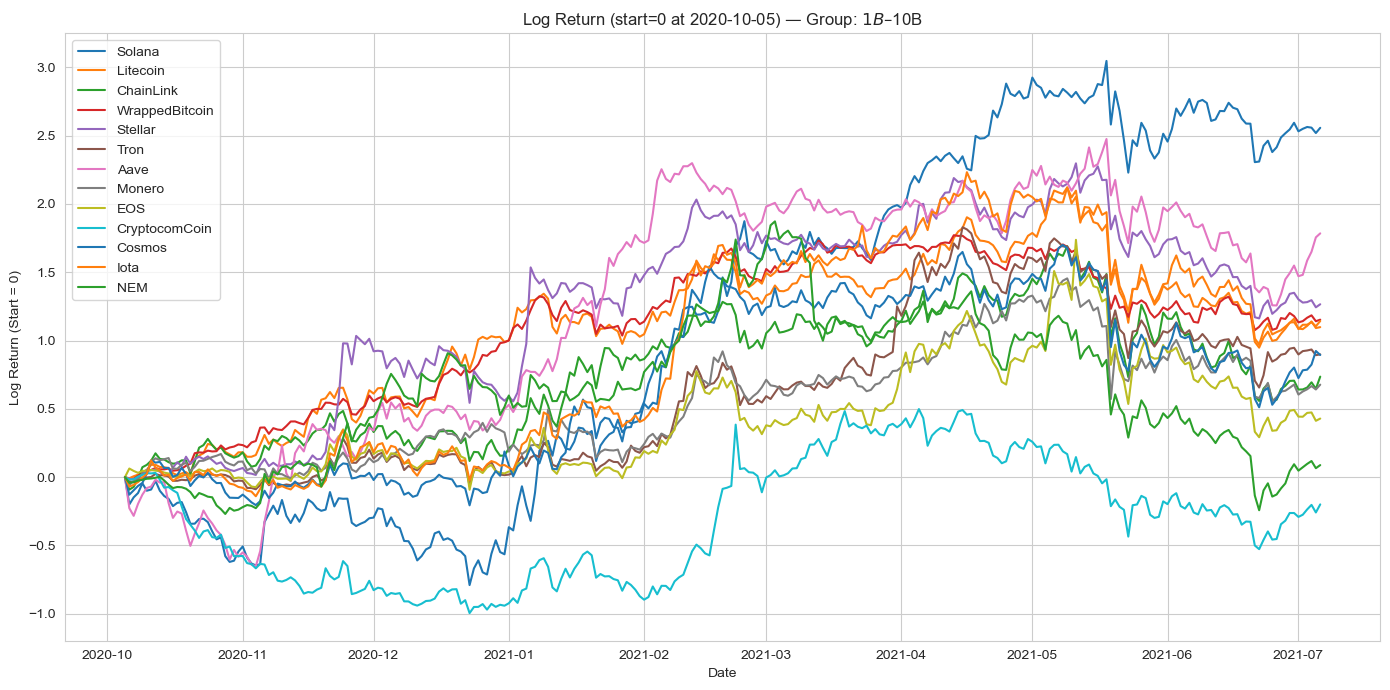

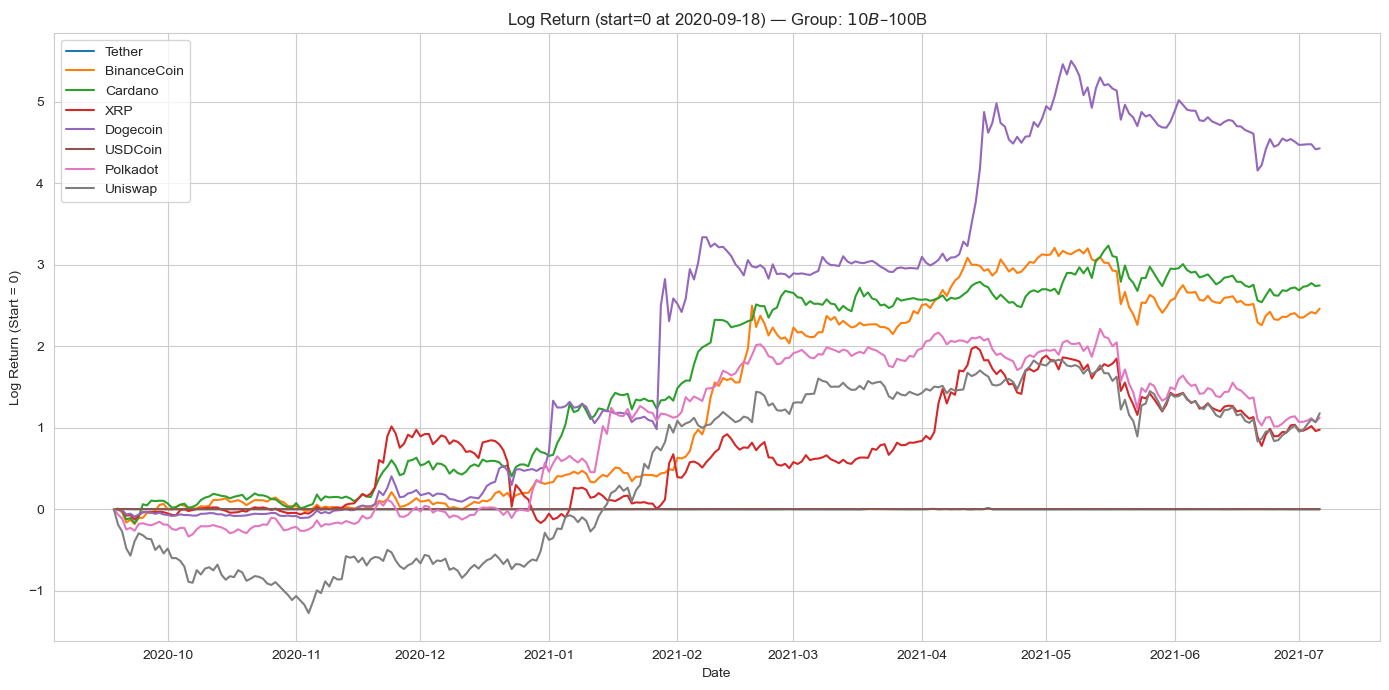

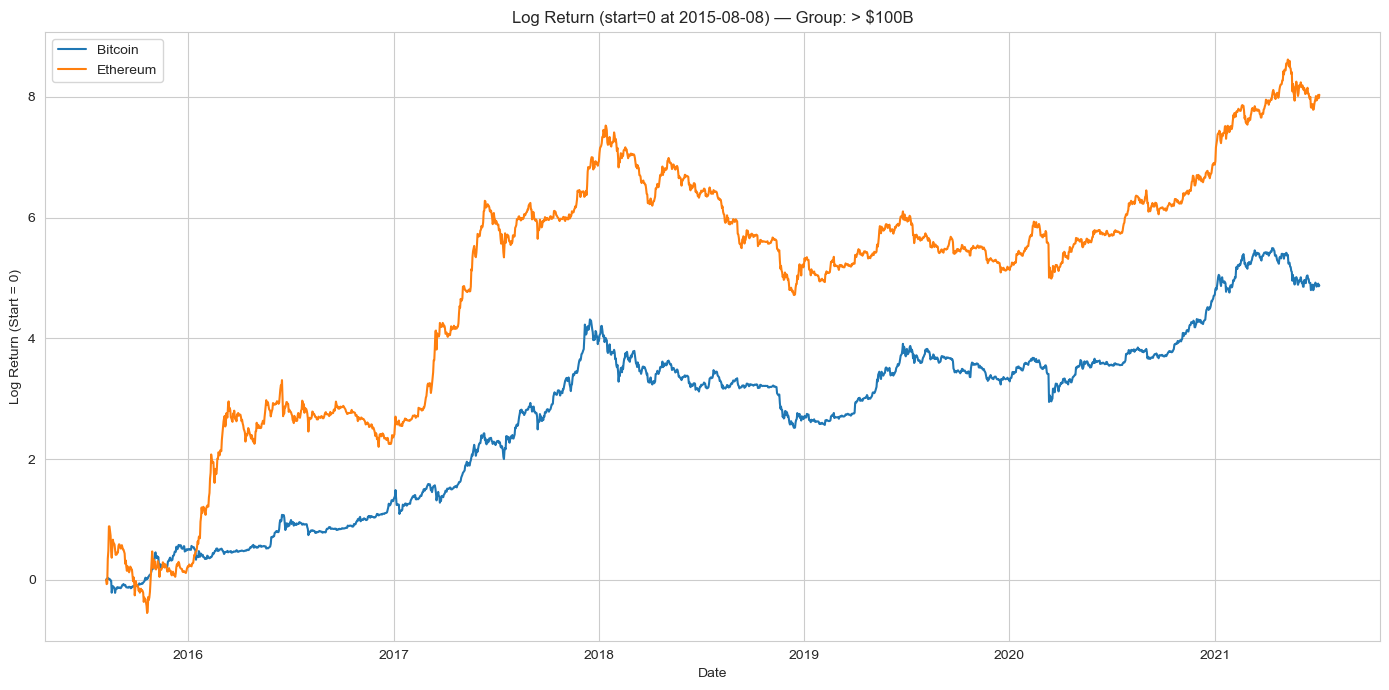

In [105]:
for group, group_df in summary_df.groupby('Market Cap Group'):
    coins_in_group = group_df['Coin'].tolist()
    if not coins_in_group:
        continue

    # Find the latest start date among the coins in this group
    group_start_dates = []
    for coin in coins_in_group:
        s = full_wide[['Date', coin]].dropna()
        if not s.empty:
            group_start_dates.append(s['Date'].iloc[0])
    if not group_start_dates:
        continue
    latest_common_start = max(group_start_dates)

    plt.figure(figsize=(14, 7))
    for coin in coins_in_group:
        series = full_wide[['Date', coin]].dropna()
        # Filter from the latest start date onward
        series = series[series['Date'] >= latest_common_start].copy()
        if not series.empty:
            # Compute log price
            series['log_price'] = np.log(series[coin])
            # Normalize so the first value is 0 at latest_common_start
            series['log_return'] = series['log_price'] - series['log_price'].iloc[0]
            plt.plot(series['Date'], series['log_return'], label=coin)

    plt.title(f'Log Return (start=0 at {latest_common_start}) — Group: {group}')
    plt.xlabel('Date')
    plt.ylabel('Log Return (Start = 0)')
    plt.legend()
    plt.tight_layout()
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">
<h2 align="left"><font color=#ffffff>Key insight:</font></h2>
<ul>Here is what we can observe and add to our analysis from the log returns plotting:</ul>
<ul>1. In the first graphic, we can see that apart from CryptocomCoin which always underperform the market, all coins follow the trend of the market, but we fail to find some particular patterns</ul>
    
<ul>2. The second graphic is much more interesting, confirming some hypothesis we had:
<ul><li>Tether and USDCoin are flat during the whole period: we understand that these two coins are what is called "stable coin", they are made to stay flat around 1$ over time. These two form a group</li></ul>
<ul><li>Apart from Dogecoin, they all follow the trend of the market, such as in the first graphic. However Dogecoin does not follow the market and seems to have very high return on some date with price jumps. This anomarl behavior suggests a lot of speculation around this coin, which explains why it is a "meme coin".</li></ul>

3. In the third graph, we clearly see a strong correlation between Etherum and Bitcoin. We can even say that the correlation is growing over time, probably with the market cap: the highest the market cap of these two coins, the higher the correlation between them.
</ul>
</div>

### 3.1.3 | Volatility of these groups

In this third part, we are going to analyze the volatility of each group of cryptocurrencies, in order to find new characterics about crypto, or to confirm hypothesis we previously made. To do so, we are going to use the 90-day volatility. 

&#8594; *Here is the code to plot the volatility of each coin for each group. Same thing as for the log returns here, we start plotting from the oldest date for which we have data + 90 days.*

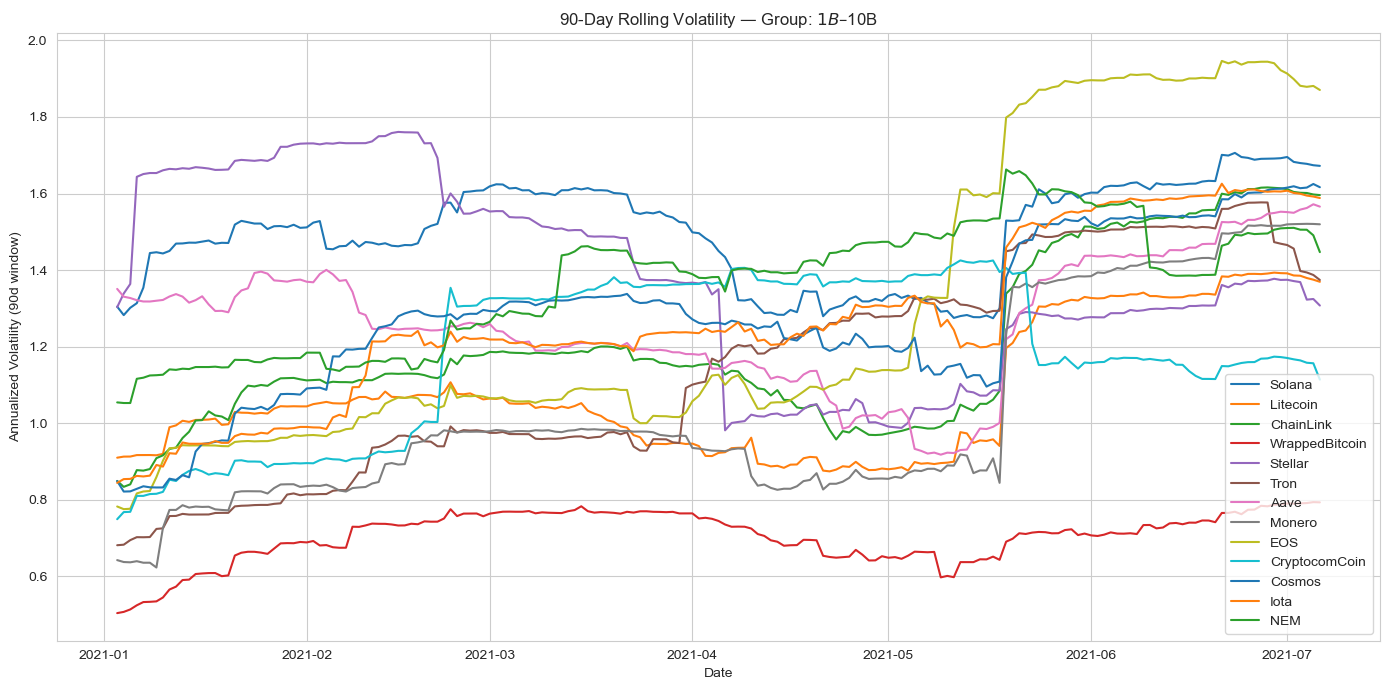

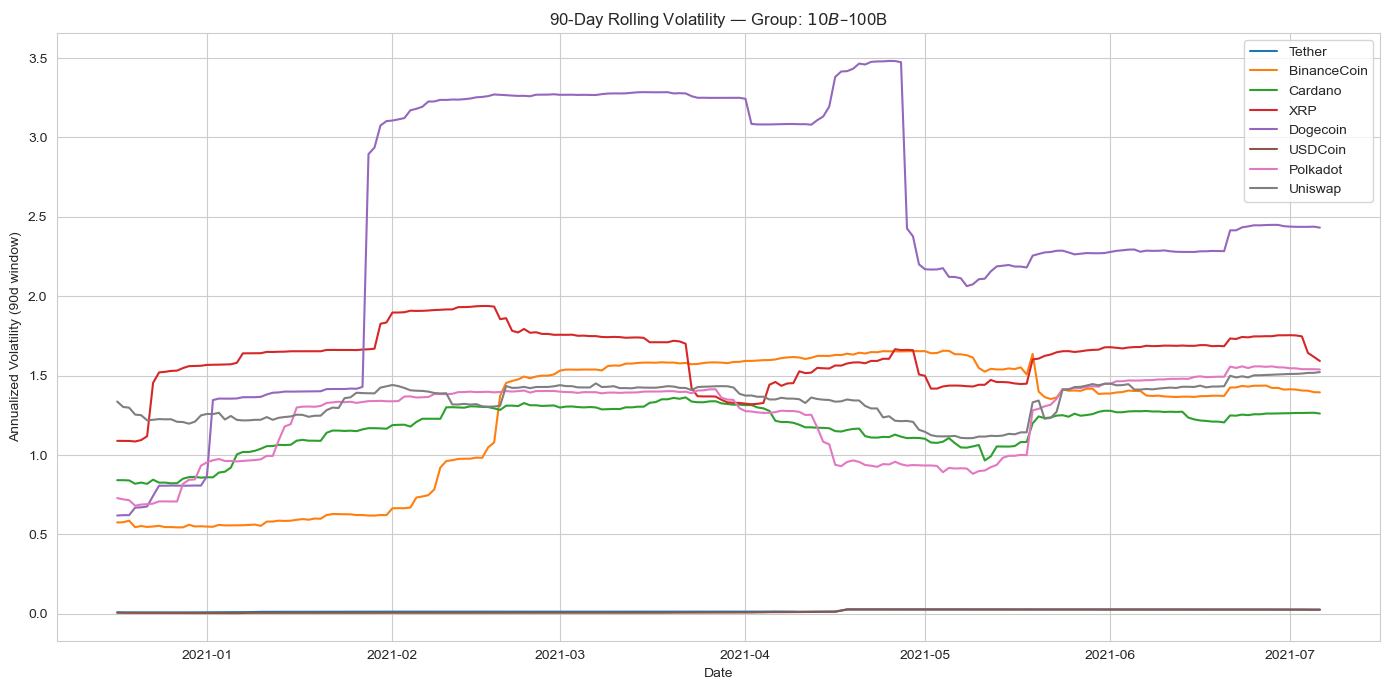

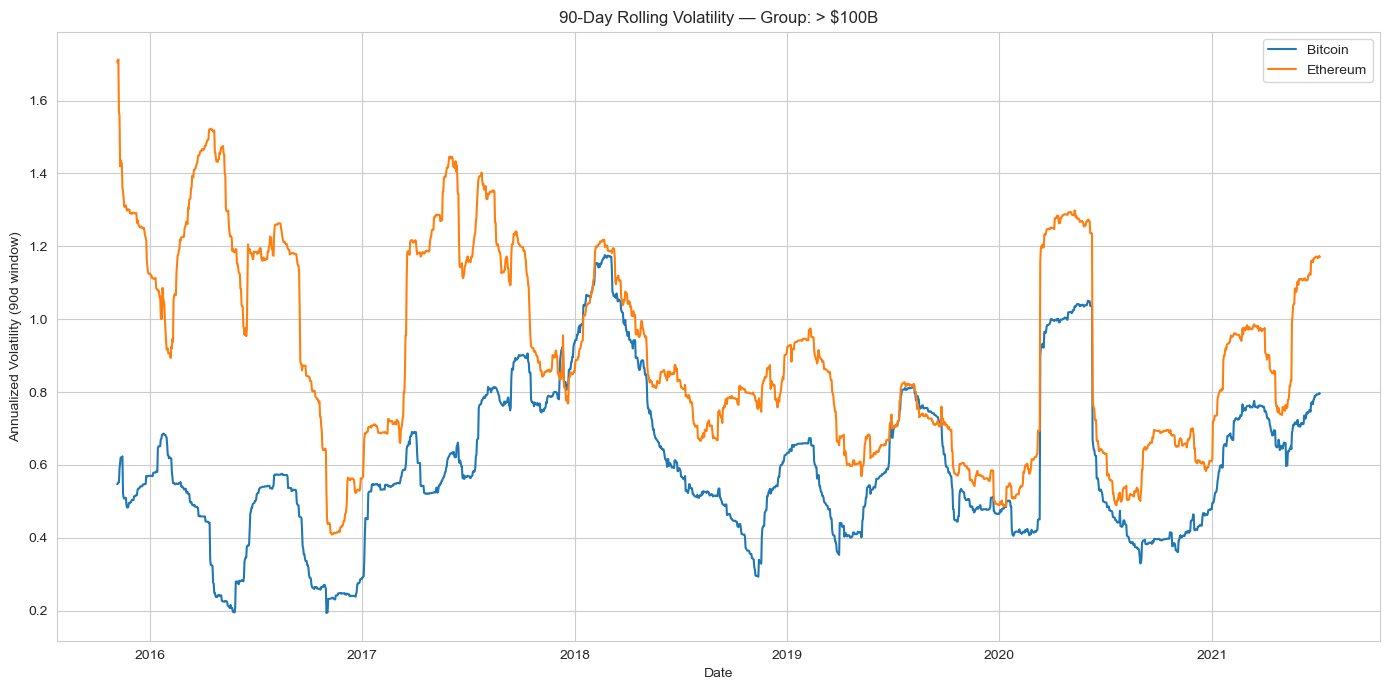

In [162]:
ROLLING_WINDOW = 90  # days (change this as needed)

for group, group_df in summary_df.groupby('Market Cap Group'):
    coins_in_group = group_df['Coin'].tolist()
    if not coins_in_group:
        continue

    # Find the latest start date among the coins in this group
    group_start_dates = []
    for coin in coins_in_group:
        s = full_wide[['Date', coin]].dropna()
        if not s.empty:
            group_start_dates.append(s['Date'].iloc[0])
    if not group_start_dates:
        continue
    latest_common_start = max(group_start_dates)

    plt.figure(figsize=(14, 7))
    for coin in coins_in_group:
        series = full_wide[['Date', coin]].dropna()
        # Filter from the latest start date onward
        series = series[series['Date'] >= latest_common_start].copy()
        if not series.empty:
            # Compute daily log returns
            series['log_return'] = np.log(series[coin]).diff()
            # Compute rolling volatility (annualized)
            series['rolling_vol'] = series['log_return'].rolling(ROLLING_WINDOW).std() * np.sqrt(252)
            # Drop initial NaN values from rolling window
            plt.plot(series['Date'], series['rolling_vol'], label=coin)

    plt.title(f'{ROLLING_WINDOW}-Day Rolling Volatility — Group: {group}')
    plt.xlabel('Date')
    plt.ylabel(f'Annualized Volatility ({ROLLING_WINDOW}d window)')
    plt.legend()
    plt.tight_layout()
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">
<h2 align="left"><font color=#ffffff>Key insight:</font></h2>
<ul>Here is what we can observe and add to our analysis from the 90-day volatility plotting:</ul>
<ul>1. In the first graphic, it appears that WrappedBitcoin has a volatility much lower than the others (always below 0.8). If we take a look at Bitcoin's volatility in 2021, we see that this is also the case: in fact WrappedBitcoin nearly follow the returns of BTC and thus its volatility.</ul>
<ul>Apart from that, we can see that CryptocomCoin and Stellar have jumps in volatility, while the whole market do not face such a jump. By the way, these two coins were part of a subgroup in the first section, because they did not face the correlation between price increases and market cap increases.</ul>
<ul>Finally, for the rest of the market in group 1, the coins seem to follow the trend without anything significantly different.</ul>
    
<ul>2. In the second graphic, the volatility belong to the same range: between 0.8 and 2. However, we see Dogecoin's volatility facing very high jumps and being above other coins' volatility. This confirm our hypothesis on the fact that this coin does not behave like the others in the market and follow its own behavior.</ul>

<ul>3. In the third graph, it seems that the correlation between BTC's volatility and ETH's volatility is increasing. While in 2016/2017 the volatilities were not the same, from 2018 they have been closely following each other. This goes in the same direction as an increasing correlation between the returns of these coins.
</ul>
</div>

### 3.1.4 | Volume of these groups

In this fourth part, we are going to analyze the volume of each coin and each group of coins. The idea here is to see if we can find patterns between some coins in volume's change, or in the contrary, if any coin's volume behave totally differently. 

&#8594; *Here is the code to plot the volume of each coin for each group. Very close to the log return code here, we are plotting log volume according to time for each coin.*

/Users/johan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


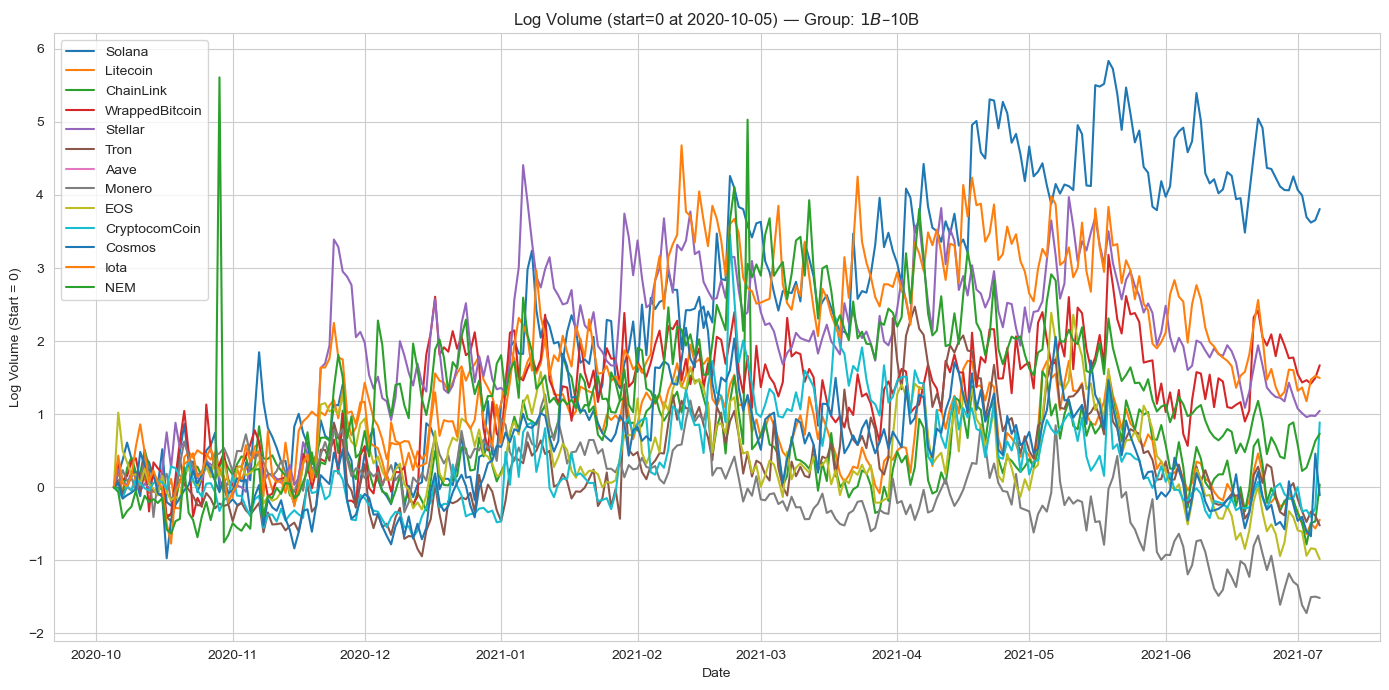

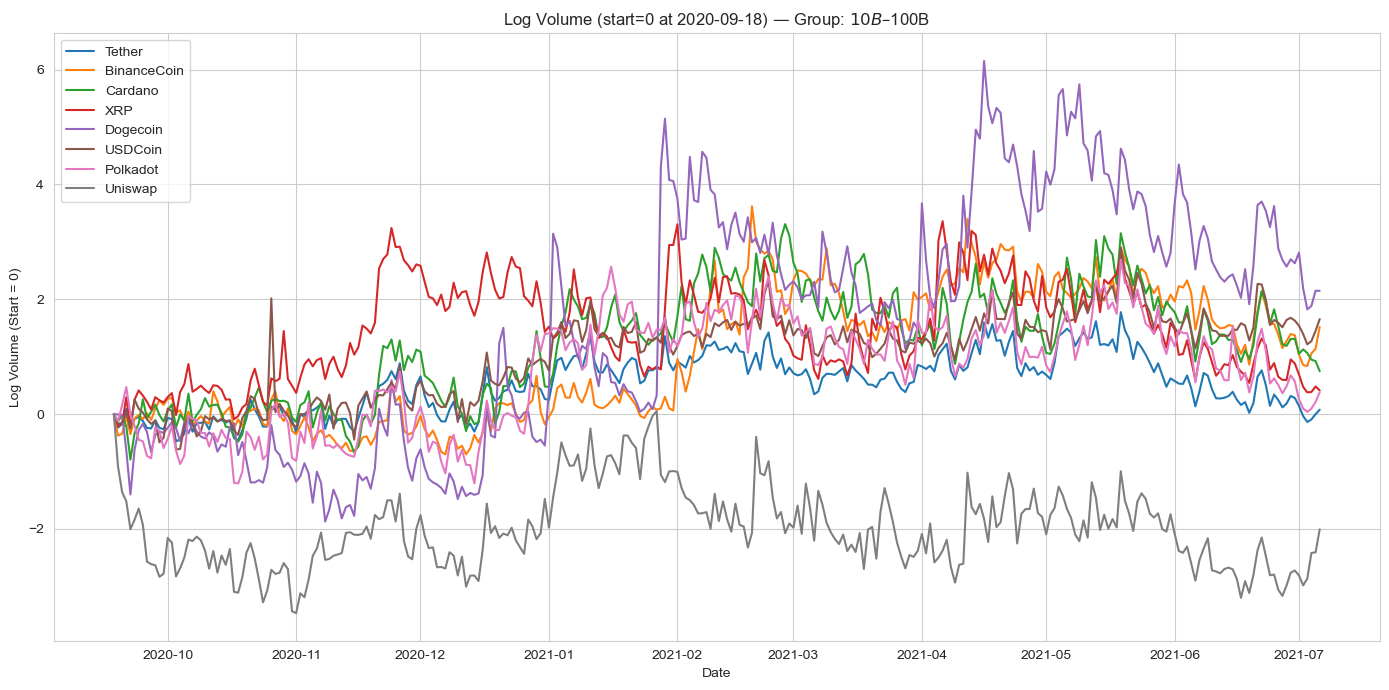

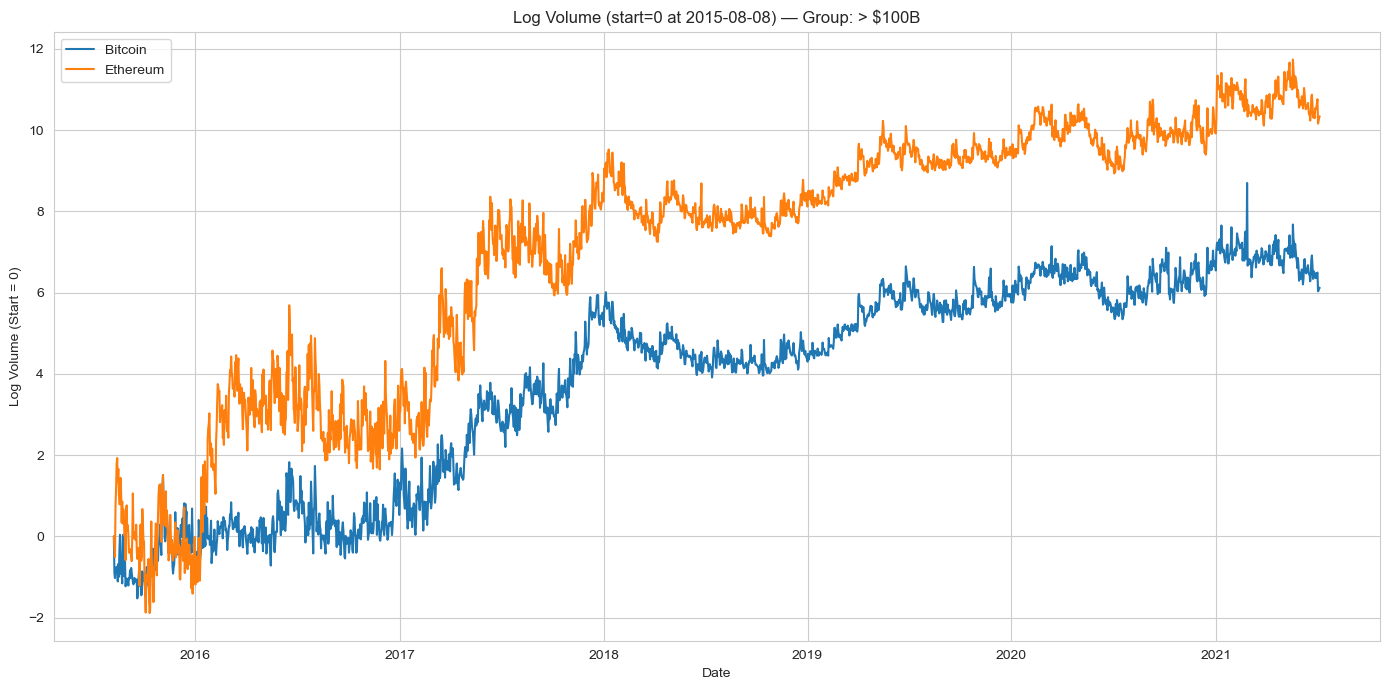

In [108]:
for group, group_df in summary_df.groupby('Market Cap Group'):
    coins_in_group = group_df['Coin'].tolist()
    if not coins_in_group:
        continue

    # Find the latest start date among the coins in this group
    group_start_dates = []
    for coin in coins_in_group:
        s = crypto_data[coin][['Date', 'Volume']].dropna()
        if not s.empty:
            group_start_dates.append(s['Date'].iloc[0])
    if not group_start_dates:
        continue
    latest_common_start = max(group_start_dates)

    plt.figure(figsize=(14, 7))
    for coin in coins_in_group:
        series = crypto_data[coin][['Date', 'Volume']].dropna()
        # Filter from the latest start date onward
        series = series[series['Date'] >= latest_common_start].copy()
        if not series.empty:
            # Compute log(volume) and normalize so first value is 0
            series['log_volume'] = np.log(series['Volume'])
            series['log_volume_norm'] = series['log_volume'] - series['log_volume'].iloc[0]
            plt.plot(series['Date'], series['log_volume_norm'], label=coin)

    plt.title(f'Log Volume (start=0 at {latest_common_start}) — Group: {group}')
    plt.xlabel('Date')
    plt.ylabel('Log Volume (Start = 0)')
    plt.legend()
    plt.tight_layout()
    plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">
<h2 align="left"><font color=#ffffff>Key insight:</font></h2>
<ul>The volume plotting is not really a success, most of the graphs are not well readable. However, I think there is 3 things to say from these graphs:</ul>
<ul>1. The third graph reminds us about the log return plotting of BTC and ETH, which highly suggests a correlation between volume increases and price increases for those coins. </ul>
    
<ul>2. In the second graph, the volume of Uniswap is low and more or less stable during the period, while when we observe its returns in the first part, they are decreasing until 10/2020, and then increasing until 5/2021. Contrary to BTC and ETH, this seems to highlight for this coin, a decorrelation between volume traded and price.  </ul>

<ul>3. We clearly see, again, the jumps in Dogecoin's volume. </ul>
</div>

### 3.1.5 | Is there a link between Volume traded and Price of a coin?

In this part 5, we are going to study the link between volume traded and price of a coin. Intuitively, the volume traded should increase as the same pace as the price of a coin. 

&#8594; *For each coin, let's plot the daily volume traded and the price of the coin over time. On the same graph, we plot the volume / price to study the relationship between both metrics. We still use logarithmic for study reasons.*

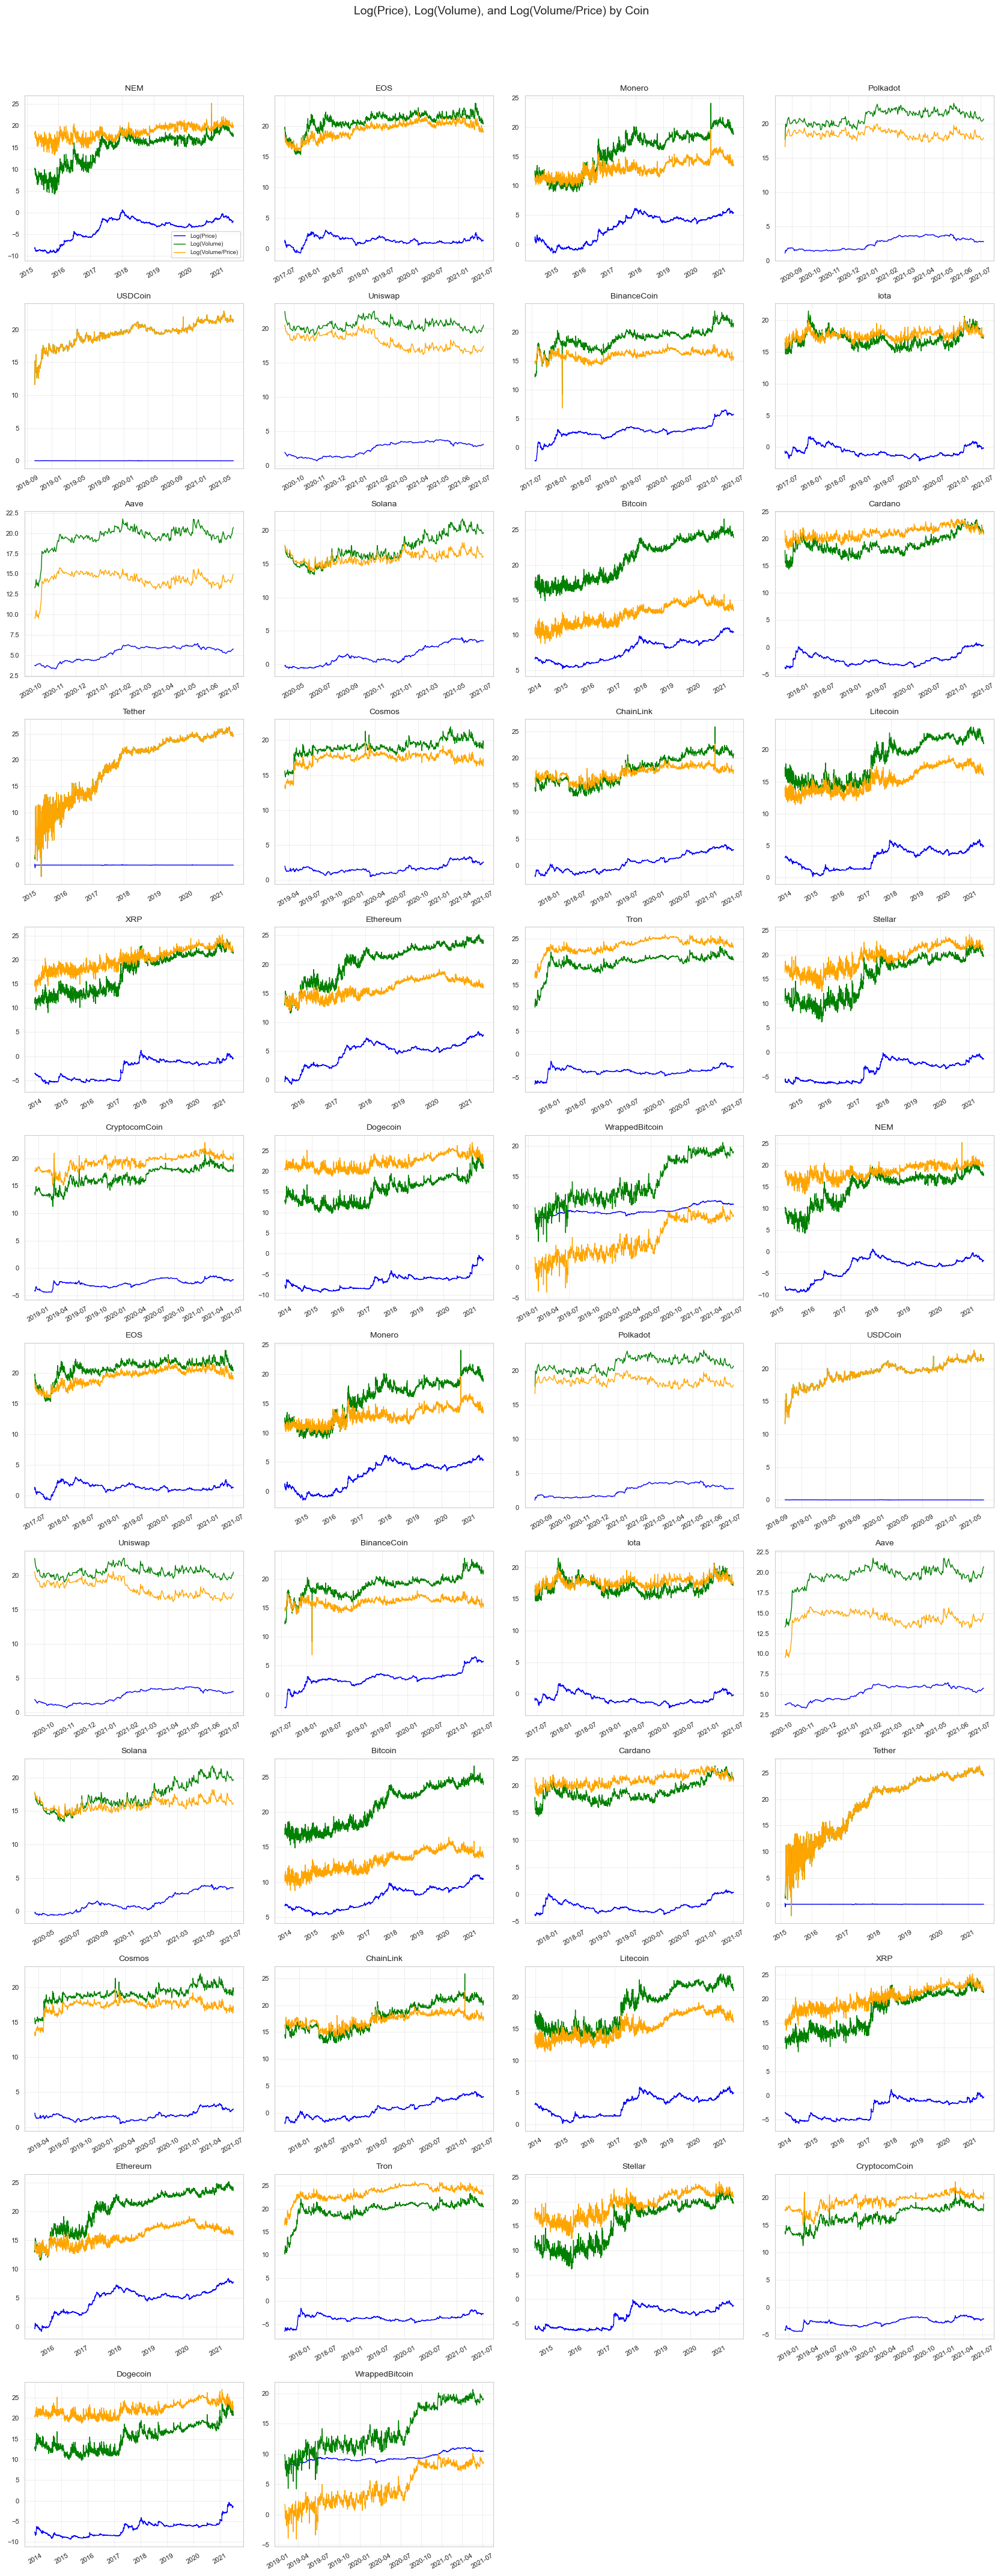

In [178]:
coin_data = {}

for coin in crypto_data:
    df = crypto_data[coin]
    # Check for required columns
    if not all(col in df.columns for col in ['Close', 'Volume']):
        continue
    df = df[['Date', 'Close', 'Volume']].dropna().copy()
    df = df[(df['Close'] > 0) & (df['Volume'] > 0)]
    if df.empty:
        continue
    df = df.sort_values('Date')
    df['log_price'] = np.log(df['Close'])
    df['log_volume'] = np.log(df['Volume'])
    df['volume_to_price'] = df['Volume'] / df['Close']
    valid_coins.append(coin)
    coin_data[coin] = df

n_coins = len(valid_coins)
if n_coins == 0:
    print("No coins with valid 'Volume' and 'Close' data found!")
else:
    n_cols = 4
    n_rows = int(np.ceil(n_coins / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4.2*n_cols, 3.5*n_rows), sharex=False)
    axes = axes.flatten()

    for idx, coin in enumerate(valid_coins):
        ax = axes[idx]
        df = coin_data[coin]
        ax.plot(df['Date'], df['log_price'], label='Log(Price)', color='blue', linewidth=1)
        ax.plot(df['Date'], df['log_volume'], label='Log(Volume)', color='green', linewidth=1)
        ax.plot(df['Date'], np.log(df['volume_to_price']), label='Log(Volume/Price)', color='orange', linewidth=1)
        ax.set_title(coin, fontsize=10)
        ax.tick_params(axis='x', labelrotation=30, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        if idx == 0:
            ax.legend(fontsize=7)
        ax.grid(True, alpha=0.3)

    # Hide empty subplots
    for idx in range(n_coins, len(axes)):
        axes[idx].axis('off')

    fig.suptitle('Log(Price), Log(Volume), and Log(Volume/Price) by Coin', fontsize=14, y=1.02)
    fig.tight_layout()
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">
<h2 align="left"><font color=#ffffff>Key insight:</font></h2>
<ul>Apart from Tether and USDCoin where the volume grows much faster than the price, but which is logical as the price is constant, I fail to analyze the results of this study. </ul>
<ul>We can note however that the global trend is that the volume increases with price increases: the interest in a coin increases when the price increases.</ul>
<ul>Also, there are 2 coins with downside trend: Uniswap and Polkadot. As the price is going up, the interest fir this coin is decreasing.</ul>
</div>

### 3.1.6 | Is there a link between market cap and price of a coin?

Now we want to study the link between market cap and price of a coin. If we observe for a given coin, that the market capitalization grows quicker than the price, it means the supply is not static. However, if the correlation between market cap and price is close to one, then the supply is near static, or tends to be static. 

&#8594; *For each coin, let's plot the marketcap and the price of the coin over time. On the same graph, we plot the supply which is equal to the marketcap divided by the price of the coin.*

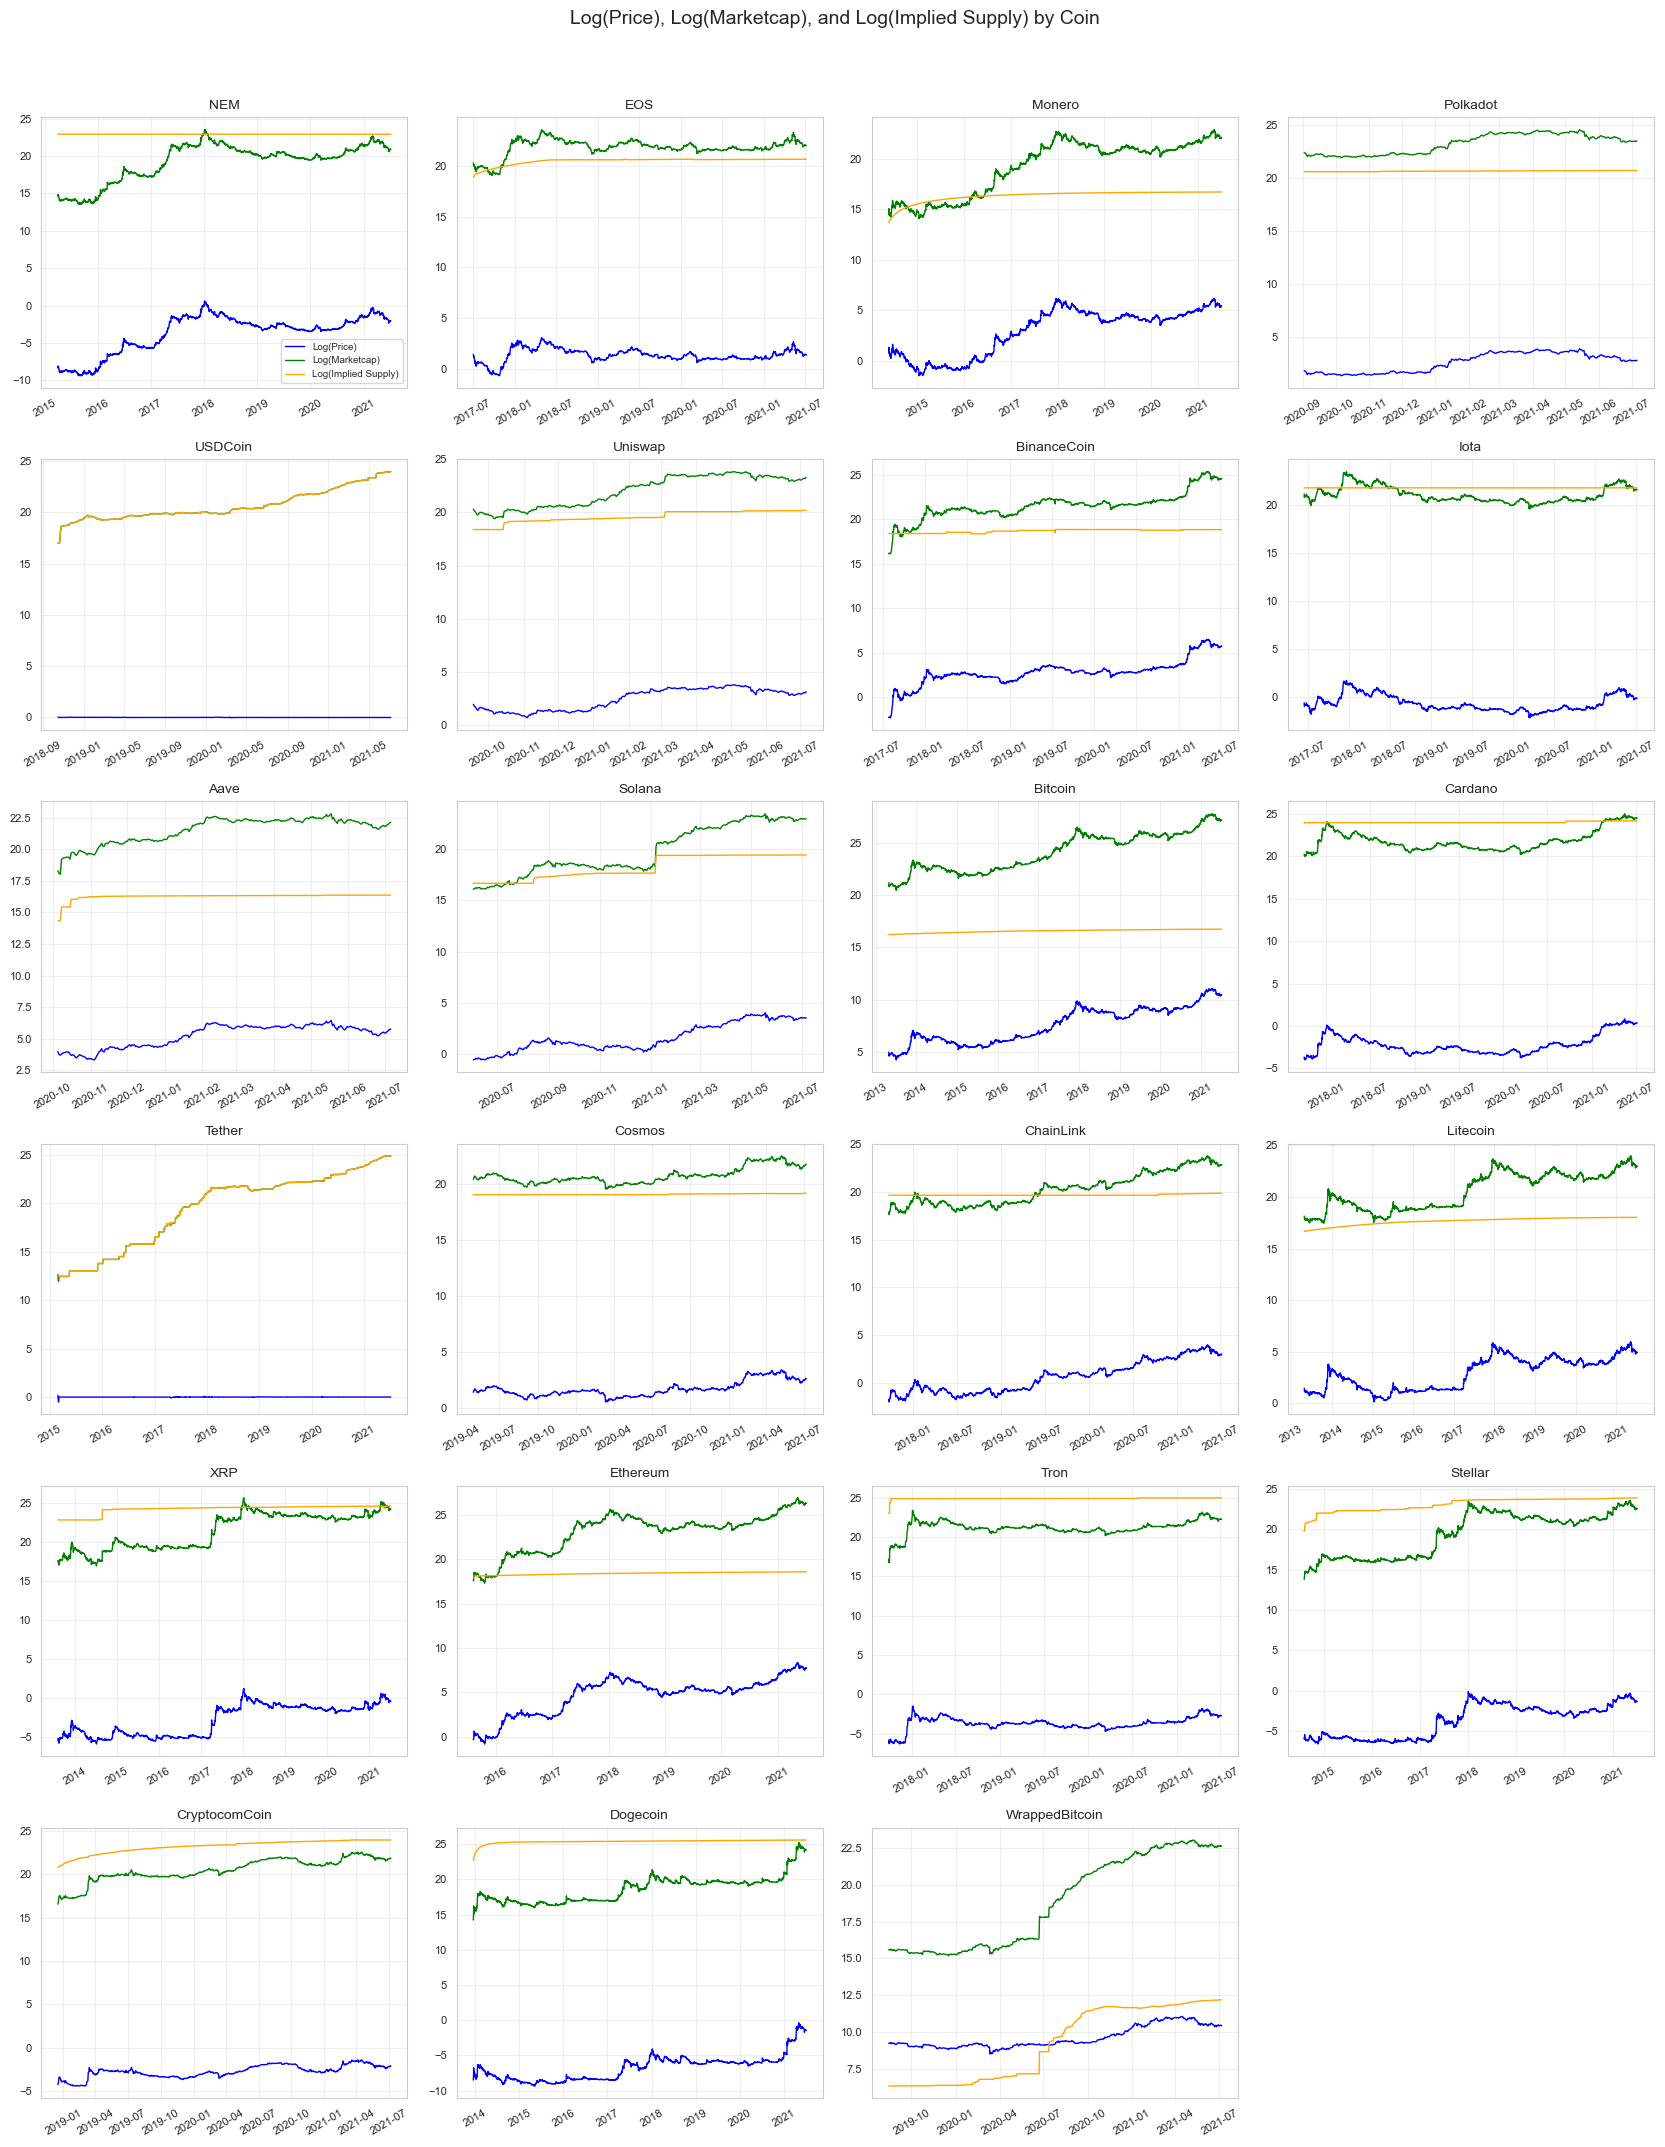

In [176]:
valid_coins = []
coin_data = {}

for coin in crypto_data:
    df = crypto_data[coin]
    # Use the correct Marketcap column name
    marketcap_col = 'Marketcap'
    if marketcap_col not in df.columns:
        continue
    df = df[['Date', 'Close', marketcap_col]].dropna().copy()
    df = df[(df['Close'] > 0) & (df[marketcap_col] > 0)]
    if df.empty:
        continue
    df = df.sort_values('Date')
    df['log_price'] = np.log(df['Close'])
    df['log_marketcap'] = np.log(df[marketcap_col])
    df['implied_supply'] = df[marketcap_col] / df['Close']
    valid_coins.append(coin)
    coin_data[coin] = df

n_coins = len(valid_coins)
if n_coins == 0:
    print("No coins with valid 'Marketcap' data found!")
else:
    n_cols = 4
    n_rows = int(np.ceil(n_coins / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4.2*n_cols, 3.5*n_rows), sharex=False)
    axes = axes.flatten()

    for idx, coin in enumerate(valid_coins):
        ax = axes[idx]
        df = coin_data[coin]
        ax.plot(df['Date'], df['log_price'], label='Log(Price)', color='blue', linewidth=1)
        ax.plot(df['Date'], df['log_marketcap'], label='Log(Marketcap)', color='green', linewidth=1)
        ax.plot(df['Date'], np.log(df['implied_supply']), label='Log(Implied Supply)', color='orange', linewidth=1)
        ax.set_title(coin, fontsize=10)
        ax.tick_params(axis='x', labelrotation=30, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        if idx == 0:
            ax.legend(fontsize=7)
        ax.grid(True, alpha=0.3)

    # Hide empty subplots
    for idx in range(n_coins, len(axes)):
        axes[idx].axis('off')

    fig.suptitle('Log(Price), Log(Marketcap), and Log(Implied Supply) by Coin', fontsize=14, y=1.02)
    fig.tight_layout()
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">
<h2 align="left"><font color=#ffffff>Key insight:</font></h2>
<ul>From this analysis, it clearly appears that WrappedBitcoin, Tether and USDCoin don't have a constant supply. It seems logical for Tether and USDCoin as they are "stable coins" from what we deduced of the above analysis.</ul>
<ul>All the other coins have constant supply, or near constant supply (like logarithmic over time). Some have jumps which suggests periodic increases in the supply.</ul>
</div>

### 3.1.7 | Correlation between the cryptocurrencies

Let's try to find a new way to group crypto via the correlations between their returns over time. We will build a heatmap, representing the correlation between the log returns of each cryptocurrency. It will be the opportunity to check if Bitcoin is leading the market.

&#8594; *Here is a simple heatmap showing the correlation of all the cryptocurrencies. At the center we have the most correlated crypto.*

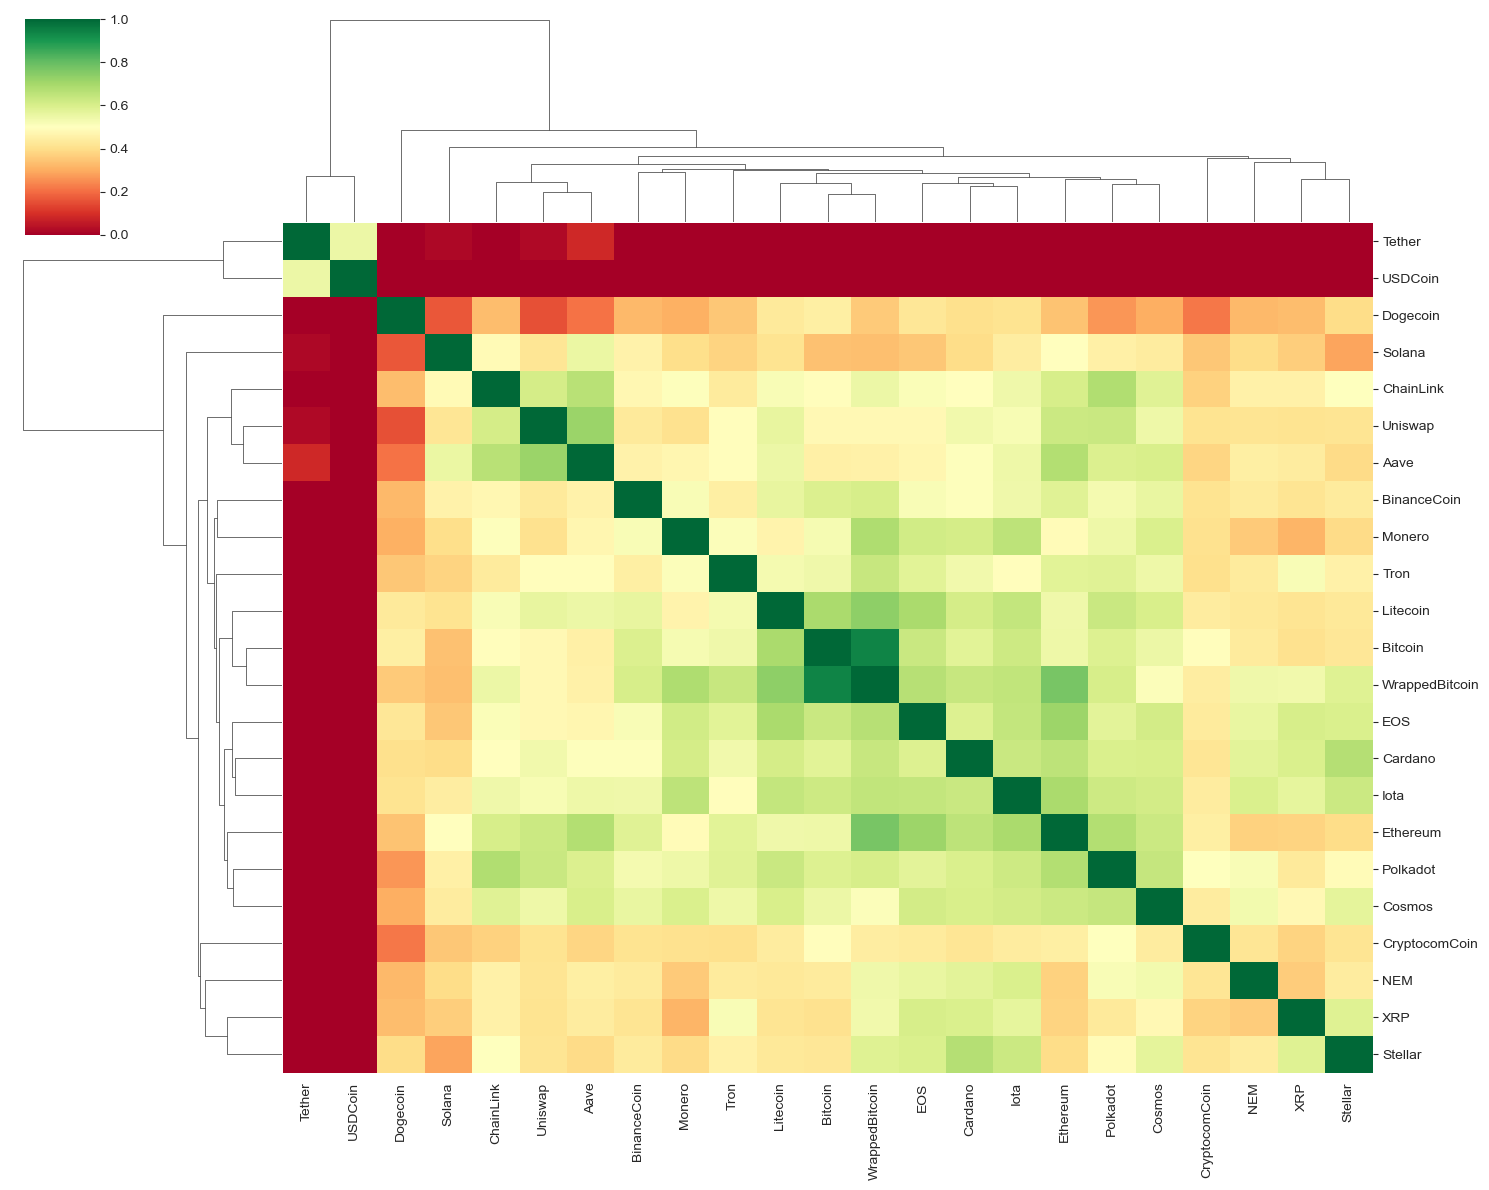

In [189]:
sns.clustermap(
    log_returns.corr(),
    method='average',
    cmap='RdYlGn',
    vmin=0, vmax=1,
    figsize=(15, 12)
)

<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">
<h2 align="left"><font color=#ffffff>Key insight:</font></h2>
<ul>Here is what we can deduce from the above graphic:</ul>
<ul>1. The Dogecoin is not correlated to anything, which could explain why it is considered as a meme coin. Solana is in the same situation to some extent.</ul>
<ul>2. Bitcoin and WrappedBitcoin are in the middle of the graphic, suggesting these two crypto lead the market and are the most correlated crypto to the others.</ul>
<ul>3. USDCoin and Tether have a 0 correlation with all crypto except themselves, which suggests that they are a group as themselves</ul>
<ul>4. ChainLink, Uniswap and Aave form a group by themselves. They are not really correlated to the market apart from Etherym and Polkadot.</ul>
</div>

<a id="preparation"></a>
# <p style="background-color:#1ca3e3; font-family:arial; color: #ffffff; font-size:130%; text-align:center; border-radius:15px 15px;">Step 3 | Conclusion</p>


<div style="border-radius:10px; padding: 15px; background-color: #1ca3e3; font-size:115%; text-align:left">
<h2 align="left"><font color=#ffffff>Key insight:</font></h2>
<ul>This analysis reveals that market capitalization is a major factor in distinguishing cryptocurrency behavior. High market cap coins generally have higher trading volumes and lower volatility. While price often increases with market cap, some coins (like USDCoin, Tether, Dogecoin) form clusters with unique patterns.</ul>
<ul>Stablecoins such as Tether and USDCoin maintain flat prices and high volumes, while WrappedBitcoin closely tracks Bitcoin but with a lower market cap. Most coins follow market trends in returns, but Dogecoin is highly volatile and uncorrelated (a "meme coin"), and CryptocomCoin underperforms.</ul>
<ul>Bitcoin and Ethereum are becoming more correlated over time. Coins like ChainLink, Uniswap, and Aave are only somewhat correlated with the main market. Dogecoin and Solana remain largely independent.</ul>
<ul>Most coins have a constant or near-constant supply, except for stablecoins and WrappedBitcoin, which have variable supply. Generally, trading volume rises with price, but Uniswap and Polkadot show the opposite trend, suggesting declining interest.</ul>
<ul>Emerging groups:</ul>
<ul>1. Stablecoins: Tether, USDCoin</ul>
<ul>2. Meme/speculative: Dogecoin (possibly Solana)</ul>
<ul>3. Leaders: Bitcoin, Ethereum</ul>
<ul>4. Derivatives from another coin: WrappedBitcoin</ul>
<ul>5. ETH correlated: ChainLink, Uniswap, Aave</ul>
<ul>6. Outliers: CryptocomCoin, Stellar, Dogecoin (clearly show a logarithmic (marketcap/price) relationship over time, and volatility jumps highly different from the market trend)</ul>
</div>